<a href="https://colab.research.google.com/github/Diya-Amith/Data-Science-Project-Galaxy-Morphology-Classification-Using-Deep-Learning-and-Explainable-AI-/blob/main/galaxyS%26E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GALAXY MORPHOLOGY CLASSIFICATION USING DEEP LEARNING AND EXPLAINABLE AI**

## **Import Libraries and Initial Loading**

In [1]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.9 MB/s eta 0:00:00


In [1]:
# Standard libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os


zip_file_path_1 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1.zip'
zip_file_path_2 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1.zip'

extract_folder_1 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1'
extract_folder_2 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1'

# Unzipping the files
with zipfile.ZipFile(zip_file_path_1, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_1)

with zipfile.ZipFile(zip_file_path_2, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_2)

In [3]:

train_images_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1/images_training_rev1"
labels_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1/training_solutions_rev1.csv"



## **Preprocessing**

### **Labels**

In [4]:
# Load labels
labels_df = pd.read_csv(labels_path)


In [5]:
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [6]:
labels_df.shape

(61578, 38)

In [7]:
labels_df['image_path'] = labels_df['GalaxyID'].astype(str) + '.jpg'
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,image_path
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg


In [8]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GalaxyID    61578 non-null  int64  
 1   Class1.1    61578 non-null  float64
 2   Class1.2    61578 non-null  float64
 3   Class1.3    61578 non-null  float64
 4   Class2.1    61578 non-null  float64
 5   Class2.2    61578 non-null  float64
 6   Class3.1    61578 non-null  float64
 7   Class3.2    61578 non-null  float64
 8   Class4.1    61578 non-null  float64
 9   Class4.2    61578 non-null  float64
 10  Class5.1    61578 non-null  float64
 11  Class5.2    61578 non-null  float64
 12  Class5.3    61578 non-null  float64
 13  Class5.4    61578 non-null  float64
 14  Class6.1    61578 non-null  float64
 15  Class6.2    61578 non-null  float64
 16  Class7.1    61578 non-null  float64
 17  Class7.2    61578 non-null  float64
 18  Class7.3    61578 non-null  float64
 19  Class8.1    61578 non-nul

In [9]:
# missing values
missing_values = labels_df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)

if missing_values.sum() > 0:
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values in the dataset.")

Missing Values in Each Column:
GalaxyID      0
Class1.1      0
Class1.2      0
Class1.3      0
Class2.1      0
Class2.2      0
Class3.1      0
Class3.2      0
Class4.1      0
Class4.2      0
Class5.1      0
Class5.2      0
Class5.3      0
Class5.4      0
Class6.1      0
Class6.2      0
Class7.1      0
Class7.2      0
Class7.3      0
Class8.1      0
Class8.2      0
Class8.3      0
Class8.4      0
Class8.5      0
Class8.6      0
Class8.7      0
Class9.1      0
Class9.2      0
Class9.3      0
Class10.1     0
Class10.2     0
Class10.3     0
Class11.1     0
Class11.2     0
Class11.3     0
Class11.4     0
Class11.5     0
Class11.6     0
image_path    0
dtype: int64

No missing values in the dataset.


### **Images**

In [12]:
# number of images
train_image_count = len(os.listdir(train_images_path))

print(f"Number of images in training folder: {train_image_count}")

Number of images in training folder: 61578


In [13]:
# list of image file names in the training folder
training_images = set(os.listdir(train_images_path))

filtered_labels_df = labels_df[labels_df['image_path'].isin(training_images)].copy()

filtered_labels_df.reset_index(drop=True, inplace=True)

print(f"Number of images in training folder: {len(training_images)}")
print(f"Number of rows in filtered_labels_df: {filtered_labels_df.shape[0]}")
filtered_labels_df.head()

Number of images in training folder: 61578
Number of rows in filtered_labels_df: 61578


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,image_path
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg


In [14]:
def refine_classification(row):
    if row['Class1.2'] >= 0.7:
        return 'Spiral'
    elif row['Class1.1'] >= 0.8:
        return 'Elliptical'
    else:
        return 'Uncertain'

filtered_labels_df['Galaxy_Type'] = filtered_labels_df.apply(refine_classification, axis=1)

print(filtered_labels_df['Galaxy_Type'].value_counts())


Galaxy_Type
Uncertain     30780
Spiral        22666
Elliptical     8132
Name: count, dtype: int64


In [15]:
new_galaxy_df = filtered_labels_df[['GalaxyID','Galaxy_Type', 'image_path']]

print(new_galaxy_df.head())

   GalaxyID Galaxy_Type  image_path
0    100008   Uncertain  100008.jpg
1    100023   Uncertain  100023.jpg
2    100053   Uncertain  100053.jpg
3    100078   Uncertain  100078.jpg
4    100090  Elliptical  100090.jpg


In [16]:
new_galaxy_df.to_csv('galaxy_classifications.csv', index=False)

In [17]:
print(f'Total number of galaxies: {len(new_galaxy_df)}')


Total number of galaxies: 61578


In [18]:
label_encoder = LabelEncoder()
new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)
print("Balanced DataFrame with Encoded Classes:")
print(new_galaxy_df.head())

Label Encoding Mapping:
{'Elliptical': 0, 'Spiral': 1, 'Uncertain': 2}
Balanced DataFrame with Encoded Classes:
   GalaxyID Galaxy_Type  image_path  class_encoded
0    100008   Uncertain  100008.jpg              2
1    100023   Uncertain  100023.jpg              2
2    100053   Uncertain  100053.jpg              2
3    100078   Uncertain  100078.jpg              2
4    100090  Elliptical  100090.jpg              0


<ipython-input-18-95caf580d9f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])


## **EDA**

Image size for 100008.jpg: (424, 424)


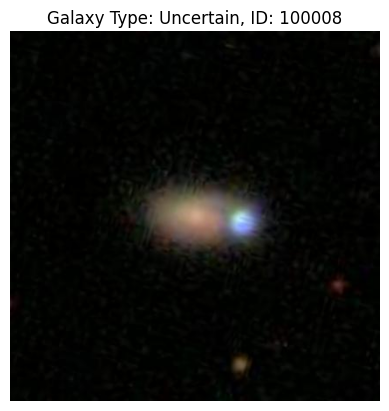

In [19]:
image_filename = new_galaxy_df.iloc[0]['image_path']
image_path = os.path.join(train_images_path, image_filename)

image = Image.open(image_path)
print(f"Image size for {image_filename}: {image.size}")

random_image_filename = random.choice(new_galaxy_df['image_path'])  # Get a random image filename
random_image_path = os.path.join(train_images_path, random_image_filename)  # Construct the full path
random_image = Image.open(random_image_path)  # Open the image

plt.imshow(random_image)
plt.title(f"Galaxy Type: {new_galaxy_df.iloc[0]['Galaxy_Type']}, ID: {new_galaxy_df.iloc[0]['GalaxyID']}")
plt.axis('off')
plt.show()

## **Data Splitting**

In [19]:
limited_data = []

for class_label in new_galaxy_df['class_encoded'].unique():
    class_data = new_galaxy_df[new_galaxy_df['class_encoded'] == class_label]
    class_data_limited = class_data.head(2000)
    limited_data.append(class_data_limited)
limited_df = pd.concat(limited_data)


In [20]:
class_distribution = limited_df['class_encoded'].value_counts()

# Print the class distribution
print("Class Distribution in Limited DataFrame:")
print(class_distribution)


Class Distribution in Limited DataFrame:
class_encoded
2    2000
0    2000
1    2000
Name: count, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split

X = limited_df['image_path']
y = limited_df['class_encoded']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

train_df = pd.DataFrame({'image_path': X_train, 'class_encoded': y_train})
val_df = pd.DataFrame({'image_path': X_val, 'class_encoded': y_val})

print("Training Set Class Distribution:")
print(train_df['class_encoded'].value_counts())

print("\nValidation Set Class Distribution:")
print(val_df['class_encoded'].value_counts())


Training Set Class Distribution:
class_encoded
2    1600
1    1600
0    1600
Name: count, dtype: int64

Validation Set Class Distribution:
class_encoded
0    400
2    400
1    400
Name: count, dtype: int64


## **Augmentation**

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
train_df['class_encoded'] = train_df['class_encoded'].astype(str)
val_df['class_encoded'] = val_df['class_encoded'].astype(str)

# Train Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_images_path,
    x_col='image_path',
    y_col='class_encoded',  # Class labels as strings
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=64,
    class_mode='categorical'  # Since class labels are now strings
)

# Validation Generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=train_images_path,
    x_col='image_path',
    y_col='class_encoded',  # Class labels as strings
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=64,
    class_mode='categorical'
)

Found 4800 validated image filenames belonging to 3 classes.
Found 1200 validated image filenames belonging to 3 classes.


## **Model 1: VGG16**

### **Initialisation**

In [22]:
# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[:-4]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
output_layer = Dense(3, activation='softmax')(x)

vgg16_model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
vgg16_model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['class_encoded']),
    y=train_df['class_encoded']
)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

58889256/58889256 [==============================] - 0s 0us/step
Class Weights: {0: 1.0, 1: 1.0, 2: 1.0}


### **Training**

In [23]:
# Set callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_vgg16_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
]

# Train the model
history = vgg16_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight=class_weights_dict,
    callbacks=callbacks
)

Epoch 1/30
75/75 [==============================] - 1692s 23s/step - loss: 2.8485 - accuracy: 0.4715 - val_loss: 2.4095 - val_accuracy: 0.6375
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 141s 2s/step - loss: 2.2718 - accuracy: 0.6321 - val_loss: 2.0338 - val_accuracy: 0.6783
Epoch 3/30
75/75 [==============================] - 142s 2s/step - loss: 1.9483 - accuracy: 0.6496 - val_loss: 1.7634 - val_accuracy: 0.6950
Epoch 4/30
75/75 [==============================] - 141s 2s/step - loss: 1.6911 - accuracy: 0.6712 - val_loss: 1.5346 - val_accuracy: 0.7092
Epoch 5/30
75/75 [==============================] - 143s 2s/step - loss: 1.5070 - accuracy: 0.6729 - val_loss: 1.3956 - val_accuracy: 0.6750
Epoch 6/30
75/75 [==============================] - 142s 2s/step - loss: 1.3454 - accuracy: 0.6819 - val_loss: 1.2651 - val_accuracy: 0.6775
Epoch 7/30
75/75 [==============================] - 142s 2s/step - loss: 1.2249 - accuracy: 0.6906 - val_loss: 1.1440 - val_accuracy: 0.6958
Epoch 8/30
75/75 [==============================] - 142s 2s/step - loss: 1.1180 - accuracy: 0.6896 - val_loss: 1.0355 - val_accuracy: 0.7025
Epoch 9/30
75/75 [======

In [24]:
# Save the trained model
vgg16_model.save('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/vgg16_model.h5')


### **Validation**

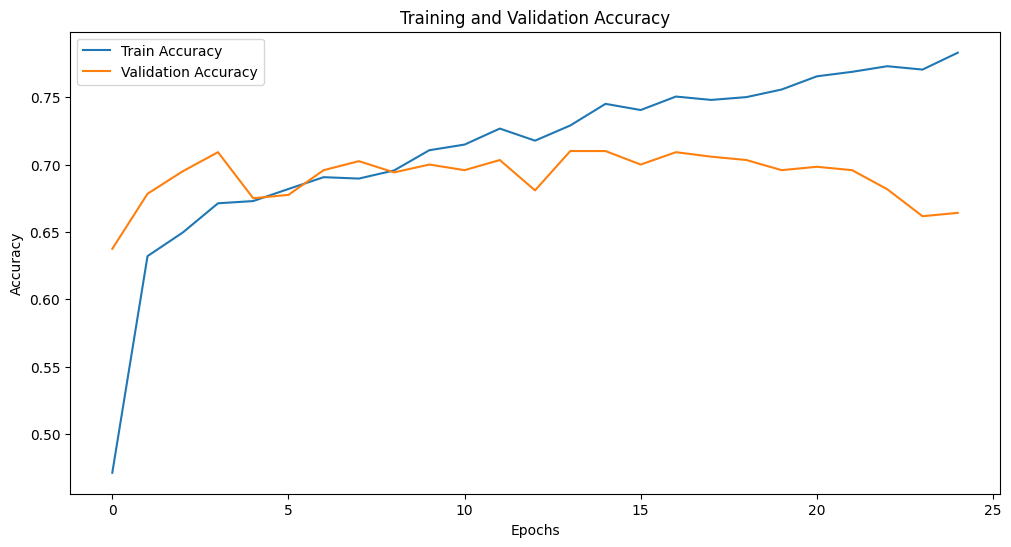

In [25]:
# Plot training and validation
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [26]:
# Evaluate on validation set
val_loss, val_accuracy = vgg16_model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


19/19 [==============================] - 21s 1s/step - loss: 0.7265 - accuracy: 0.6958
Validation Loss: 0.7265193462371826
Validation Accuracy: 0.6958333253860474


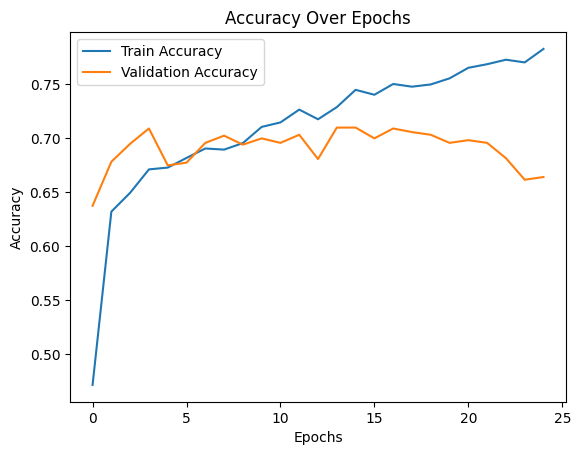

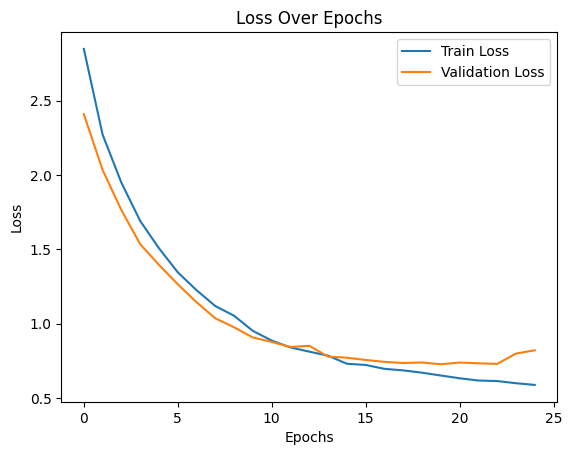

In [27]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


1/1 [==============================] - 0s 209ms/step
Image: 269287.jpg
Predicted Class: Spiral


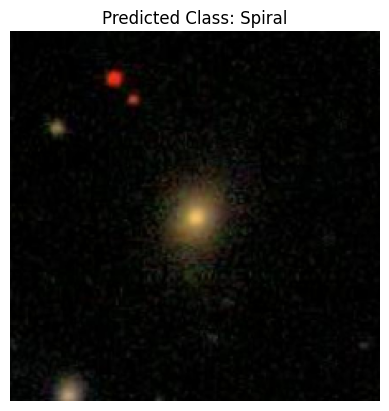

1/1 [==============================] - 0s 67ms/step
Image: 126625.jpg
Predicted Class: Spiral


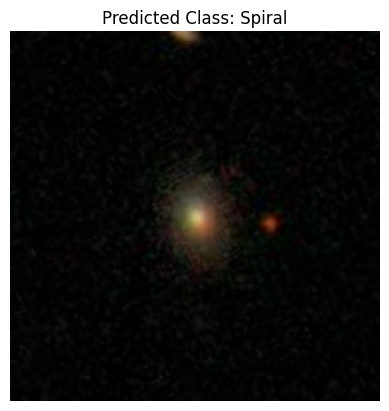

1/1 [==============================] - 0s 66ms/step
Image: 177049.jpg
Predicted Class: Elliptical


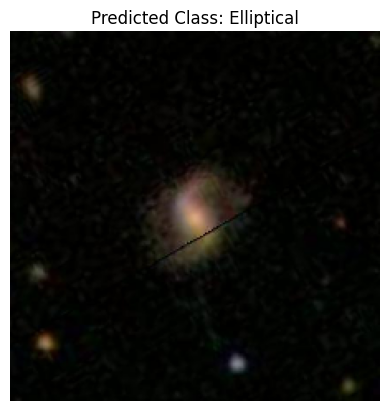

1/1 [==============================] - 0s 71ms/step
Image: 100474.jpg
Predicted Class: Uncertain


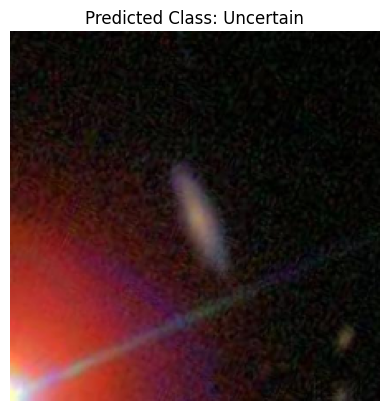

1/1 [==============================] - 0s 67ms/step
Image: 117045.jpg
Predicted Class: Elliptical


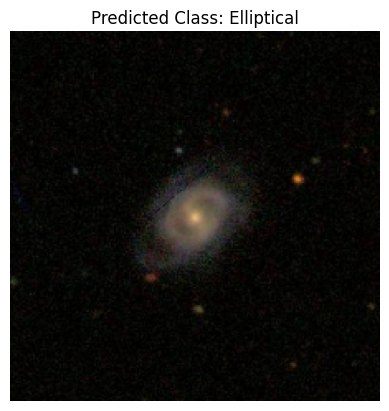

In [28]:
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np


random_images = random.sample(list(val_df['image_path']), 5)

for image_filename in random_images:
    image_path = os.path.join(train_images_path, image_filename)

    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0) / 255.0

    prediction = vgg16_model.predict(image_array)

    predicted_class = np.argmax(prediction)

    class_labels = {0: 'Spiral', 1: 'Elliptical', 2: 'Uncertain'}
    predicted_label = class_labels[predicted_class]

    # Display the result
    print(f"Image: {image_filename}")
    print(f"Predicted Class: {predicted_label}")

    # Display the image
    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_label}")
    plt.axis('off')
    plt.show()


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = val_generator.classes

# Predict on validation data
y_pred = vgg16_model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=val_generator.class_indices.keys()))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


19/19 [==============================] - 22s 1s/step
              precision    recall  f1-score   support

           0       0.36      0.41      0.38       400
           1       0.34      0.38      0.36       400
           2       0.36      0.28      0.32       400

    accuracy                           0.35      1200
   macro avg       0.35      0.35      0.35      1200
weighted avg       0.35      0.35      0.35      1200

Confusion Matrix:
[[162 144  94]
 [145 151 104]
 [144 144 112]]


## **Model 2: Resnet50**

### **Initialisation**

In [11]:

base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model_resnet.layers[:-4]:
    layer.trainable = False
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # L2 regularization
x = Dropout(0.5)(x)
output_layer_resnet = Dense(3, activation='softmax')(x)  # 3 output classes (Spiral, Elliptical, Uncertain)

resnet_model = Model(inputs=base_model_resnet.input, outputs=output_layer_resnet)

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Print summary
resnet_model.summary()


94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                         

In [23]:
# Compute class weights
class_weights_resnet = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['class_encoded']),
    y=train_df['class_encoded']
)
class_weights_resnet_dict = dict(enumerate(class_weights_resnet))
print("Class Weights for ResNet:", class_weights_resnet_dict)

# Callbacks
callbacks_resnet = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_resnet_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
]

Class Weights for ResNet: {0: 1.0, 1: 1.0, 2: 1.0}


### **Training**

In [ ]:
# Train the model
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight=class_weights_resnet_dict,
    callbacks=callbacks_resnet
)

Epoch 1/30
75/75 [==============================] - ETA: 0s - loss: 3.2368 - accuracy: 0.3254 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 1819s 24s/step - loss: 3.2368 - accuracy: 0.3254 - val_loss: 2.9498 - val_accuracy: 0.3333
Epoch 2/30
75/75 [==============================] - 127s 2s/step - loss: 2.6305 - accuracy: 0.3487 - val_loss: 2.4416 - val_accuracy: 0.3333
Epoch 3/30
75/75 [==============================] - 126s 2s/step - loss: 2.2069 - accuracy: 0.3585 - val_loss: 2.0603 - val_accuracy: 0.3333
Epoch 4/30
75/75 [==============================] - 127s 2s/step - loss: 1.9034 - accuracy: 0.3550 - val_loss: 1.7993 - val_accuracy: 0.4033
Epoch 5/30
75/75 [==============================] - 127s 2s/step - loss: 1.6881 - accuracy: 0.3667 - val_loss: 1.6034 - val_accuracy: 0.3333
Epoch 6/30
75/75 [==============================] - 125s 2s/step - loss: 1.5310 - accuracy: 0.3887 - val_loss: 1.4747 - val_accuracy: 0.3808
Epoch 7/30
75/75 [==============================] - 126s 2s/step - loss: 1.4252 - accuracy: 0.3817 - val_loss: 1.3811 - val_accuracy: 0.4233
Epoch 8/30
75/75 [====

In [ ]:
# Save the trained model
resnet_model.save('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/resnet_model.h5')


### **Validation**

## **Model 3: Custom Build Model 2:**

### **Initialisation**

In [34]:
# Custom CNN Model Definition
def build_custom_cnn(input_shape=(224, 224, 3), num_classes=3):
    model = models.Sequential()

    # First Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(2, 2))

    # Second Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))

    # Third Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))

    # Fully Connected Layer
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout to reduce overfitting

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))  # 3 output classes (Spiral, Elliptical, Uncertain)

    return model

custom_cnn = build_custom_cnn()

# Compile the model
custom_cnn.compile(optimizer=Adam(learning_rate=1e-4),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Set up EarlyStopping and ModelCheckpoint callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_custom_cnn_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
]

### **Training**

In [35]:
# Train the model
history = custom_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight=class_weights_dict,  # Add class weights
    callbacks=callbacks
)

Epoch 1/30
75/75 [==============================] - 1458s 19s/step - loss: 1.0455 - accuracy: 0.4533 - val_loss: 0.9974 - val_accuracy: 0.4875


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
75/75 [==============================] - 89s 1s/step - loss: 0.9803 - accuracy: 0.5279 - val_loss: 0.9415 - val_accuracy: 0.5433
Epoch 3/30
75/75 [==============================] - 89s 1s/step - loss: 0.9378 - accuracy: 0.5433 - val_loss: 0.9019 - val_accuracy: 0.5783
Epoch 4/30
75/75 [==============================] - 89s 1s/step - loss: 0.9110 - accuracy: 0.5633 - val_loss: 0.8716 - val_accuracy: 0.5758
Epoch 5/30
75/75 [==============================] - 89s 1s/step - loss: 0.8737 - accuracy: 0.5856 - val_loss: 0.8449 - val_accuracy: 0.5867
Epoch 6/30
75/75 [==============================] - 88s 1s/step - loss: 0.8458 - accuracy: 0.6002 - val_loss: 0.8259 - val_accuracy: 0.5767
Epoch 7/30
75/75 [==============================] - 88s 1s/step - loss: 0.8405 - accuracy: 0.6058 - val_loss: 0.7960 - val_accuracy: 0.5950
Epoch 8/30
75/75 [==============================] - 90s 1s/step - loss: 0.8267 - accuracy: 0.6129 - val_loss: 0.7826 - val_accuracy: 0.6208
Epoch 9/30
75/75 [==

In [37]:
# Save the trained
custom_cnn.save('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/custom_cnn_model.h5')


### **Validation**

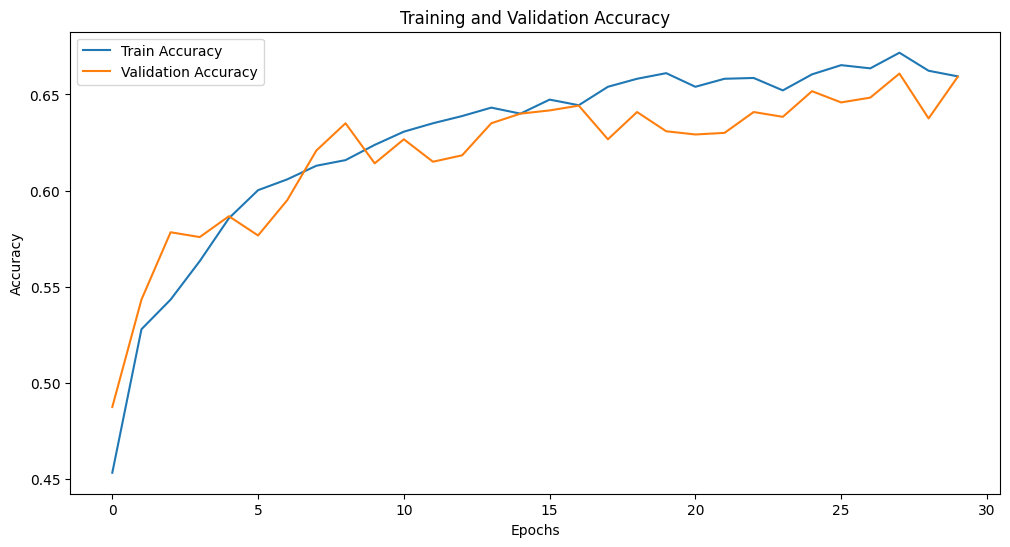

In [38]:
# Plot training and validation performance
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [39]:
val_loss, val_accuracy = custom_cnn.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

19/19 [==============================] - 7s 368ms/step - loss: 0.7083 - accuracy: 0.6592
Validation Loss: 0.7082728147506714
Validation Accuracy: 0.659166693687439


Text(0.5, 1.0, 'Accuracy Over Epochs')

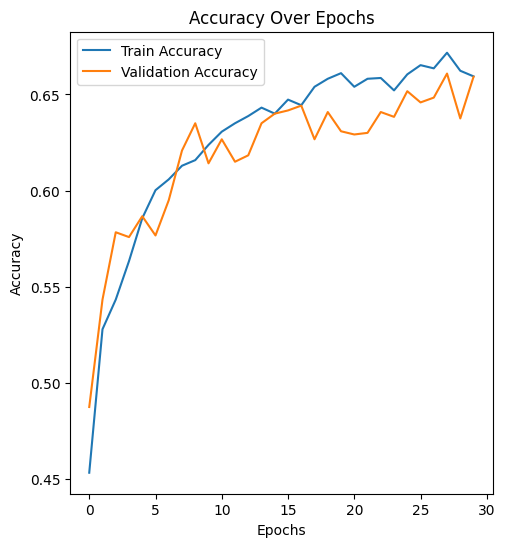

In [40]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

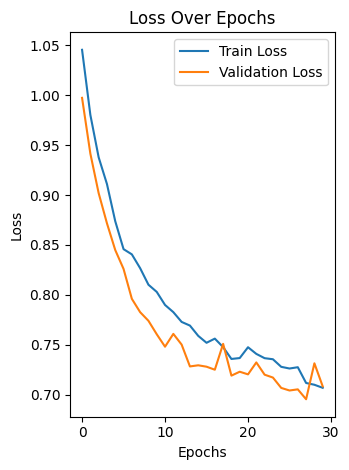

In [41]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()

In [45]:
# Predict on validation data
y_true = val_generator.classes
y_pred = custom_cnn.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=val_generator.class_indices.keys()))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

19/19 [==============================] - 7s 356ms/step
              precision    recall  f1-score   support

           0       0.32      0.42      0.37       400
           1       0.34      0.35      0.35       400
           2       0.34      0.23      0.28       400

    accuracy                           0.34      1200
   macro avg       0.34      0.34      0.33      1200
weighted avg       0.34      0.34      0.33      1200

Confusion Matrix:
[[167 141  92]
 [171 142  87]
 [176 130  94]]


## **Model 3: Ensemble Model**

In [30]:
from tensorflow.keras.models import load_model
import joblib
# Reload the saved models
vgg16_model = load_model('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/vgg16_model.h5')
custom_cnn_model = load_model('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/custom_cnn_model.h5')

print("VGG16 model loaded successfully.")
print("Custom CNN model loaded successfully.")

VGG16 model loaded successfully.
Custom CNN model loaded successfully.


In [39]:
from sklearn.ensemble import RandomForestClassifier

vgg16_val_predictions = vgg16_model.predict(val_generator)
custom_cnn_val_predictions = custom_cnn_model.predict(val_generator)

y_true = val_generator.classes

ensemble_features = np.hstack((
    vgg16_val_predictions,
    custom_cnn_val_predictions
))

meta_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
meta_classifier.fit(ensemble_features, y_true)

ensemble_predictions = meta_classifier.predict(ensemble_features)
print("Classification Report for Ensemble Model:")
print(classification_report(y_true, ensemble_predictions, target_names=val_generator.class_indices.keys()))

print("Confusion Matrix for Ensemble Model:")
conf_matrix = confusion_matrix(y_true, ensemble_predictions)
print(conf_matrix)

joblib.dump(meta_classifier, 'ensemble_meta_classifier.pkl')
print("Ensemble meta-classifier saved successfully.")


19/19 [==============================] - 7s 345ms/step
Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Confusion Matrix for Ensemble Model:
[[400   0   0]
 [  0 400   0]
 [  0   0 400]]
Ensemble meta-classifier saved successfully.
